# Chapitre 6 - Machine Learning
Dans ce chapitre on va utilisé les modules du package SKLearn

TypeError: Image data of dtype <U19 cannot be converted to float

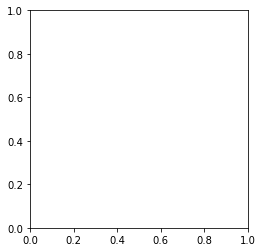

In [67]:
import matplotlib.pyplot as plt
plt.imshow('scr/imgs/ml_map.png')

## 6.1 Regression Linéaire

In [32]:
import numpy as np

## Régression
Génération des valeur de X.

In [33]:
array_gen=np.random.RandomState(seed = 0)
m=100
X = np.linspace( 0, 10, m).reshape( m, 1)

### Régression Linéaire
génération de Y. Affichage d'un data set qu'on peut le resoudre de maniére liéaire

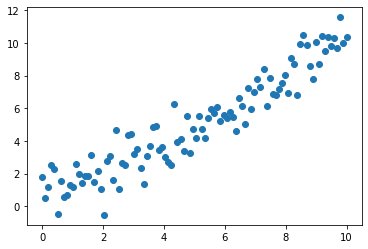

In [34]:
Y = X + array_gen.randn( m, 1)
plt.scatter(X,Y)

In [35]:
from sklearn.linear_model import LinearRegression#Imporation du module Linear Regression

In [36]:
model=LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.8881140743377214

Prediction des valeur de Y pour des features X

In [37]:
y_predict=model.predict(X)

Affichage

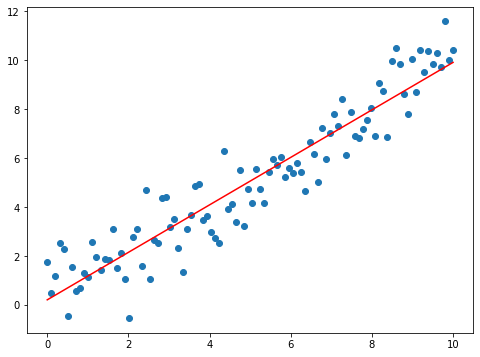

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()

### Régression Polynomiale
Affichage d'un data set qu'on peut le resoudre de maniére polinomiale

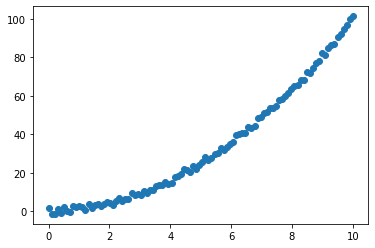

In [39]:
Y = X**2 + array_gen.randn( m, 1)
plt.scatter(X,Y)

Pour ce cas on ne peut pas le resoudre avec une méthode Linéair car cava nous donnée ca

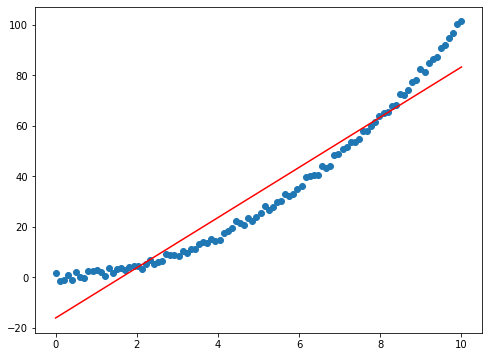

0.9325066328704199


In [ ]:
model=LinearRegression()
model.fit(X, Y)
score=model.score(X, Y)
y_predict=model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()
print(score)

On remarque automatiquement que le score est 0.9

il existe 2 Méthode:
1 ere méthode:
utilisation de SVR de SVM

In [41]:
from sklearn.svm import SVR#Imporation du module Linear Regression

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


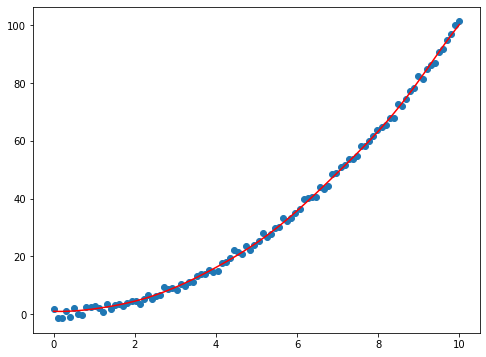

0.9989035418525655


In [44]:
model=SVR(C=100)
model.fit(X, Y)
score=model.score(X, Y)
y_predict=model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()
print(score)

2 eme méthode:
utilisation de polinomiale

In [ ]:
#code

Classification

In [188]:
import pandas as pd
import seaborn as sns
import numpy as np

In [189]:
data=pd.read_excel('src/datasets/titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [190]:
data=data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.dropna(axis=0, inplace=True)
data['sex'].replace(['male', 'female'], [ 0, 1], inplace=True)
data.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
X= data.drop(['survived'], axis=1)
Y=data['survived']
model=KNeighborsClassifier(n_neighbors=5).fit(X, Y)

In [193]:
(X_new, Y_new) = (X , Y)
score=model.score(X_new, Y_new)
score

0.8317399617590823

In [195]:
def survived( model, pclass=3, sex=0 ,age=25):
    X_me=np.array([pclass, sex, age]).reshape(1,3)
    return (model.predict(X_me), model.predict_proba(X_me))

def display(prediction_survive):
    (survived, survived_proba) = prediction_survive
    if survived == 0:
        print(f"Malheuresement si vous etiez a bor du titanic vous ne survivé pas")
        print(f"Votre Probabilité de survie est de {survived_proba[0,1]*100}%")
    else:
        print(f"Vous avez de la chanse, si vous etiez a bor du titanic vous survivé")
        print(f"Votre Probabilité de survie est de {survived_proba[0,1]*100}%")

display(survived(model))
print('-----------------------------------------------------------')
display(survived(model, pclass=2, sex=1, age=60))

Malheuresement si vous etiez a bor du titanic vous ne survivé pas
Votre Probabilité de survie est de 20.0%
-----------------------------------------------------------
Vous avez de la chanse, si vous etiez a bor du titanic vous survivé
Votre Probabilité de survie est de 60.0%


/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 6. Amélioration de l'apprentissage:
Comme vous remarquer nous avons evaluez le score du modèle en se basant sur les memes donnes de l'apprentissage du modele.
Pour evalué vraiment la fiabilité du modele il faut calculé le score avec des nouveau données qui n'a jamais vu.

C'est pour ca on utilise la fonction train_test_split du module *sklearn.model_selection* afin de divisé la dataset en 2. La première partie va etre utilisée pour le training et la deuxième pour evalué le modèle. 
Autre chose Le paramètre *n_neighbors* peut affécté sur l'apprentissage car il définit le nombre de voisin les plus proche.

Ce qu'on doit faire:
- Evaluer le modèle avec des données qui na pas utilisé dans l'entrainement.
- changé la valeur du paramètres *n_neighbors* jusqu'a avoir le meilleur score.

In [209]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [222]:
iris = load_iris()
x = iris.data
y = iris.target
y_names = iris.target_names
print(y_names)
dict_names={ 0 : y_names[0], 1 : y_names[1], 2 : y_names[2]}
print(f"La dataset (x) contient {x.shape[0]} exemples et {x.shape[1]} variables")
print(f"La dataset (y) contient {np.unique(y).size} classes")

['setosa' 'versicolor' 'virginica']
La dataset (x) contient 150 exemples et 4 variables
La dataset (y) contient 3 classes


In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
(x_train.shape, x_test.shape)

((120, 4), (30, 4))

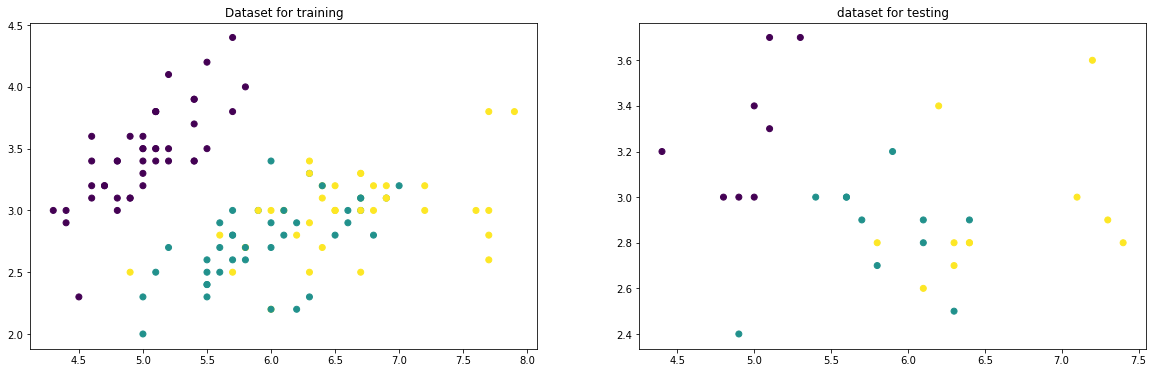

In [224]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.title("Dataset for training")
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.title("dataset for testing")
plt.show()

Dans cette etape on modifie le paramètre *n_neighbors* [1 - 50] et prendre la valeur du paramètres qui corespond au meilleur score.

In [235]:
#choix du nombre de voisins [ 0 - 50 ]
models= [ KNeighborsClassifier( n_neighbors=i).fit(x_train, y_train) for i in np.arange(1,50) ]
#On calcule le score pour chaque modèle génere avec la deuxieme partie de test
scores=[ model.score(x_test, y_test) for model in models]
index_model=np.argmax(scores)
model=models[index_model]

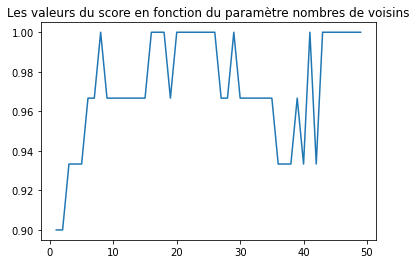

In [239]:
plt.plot(np.arange(1,50), scores)
plt.title('Les valeurs du score en fonction du paramètre nombres de voisins')
plt.show()

In [232]:
x_prec=np.array([4.5, 2.7, 3.9, 1.2]).reshape(1,4)
y_prec=model.predict(x_prec)

print(f"La fleur iris qui a les pètales de {x_prec[0,0]} de largeur et {x_prec[0,1]} de longeur s'appele : {dict_names[y_prec[0]]}")

La fleur iris qui a les pètales de 4.5 de largeur et 2.7 de longeur s'appele : versicolor


Facon Plus meilleur de divisé la dataset en utilisant SKLearn *Plus d'explication* 

Recomancant tout au debut

In [242]:
from sklearn.model_selection import cross_val_score

In [244]:
score_moy=cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring="accuracy").mean()

0.9833333333333334

Parcontre il faut aussi modifié et trouvé la meilleur valeurs du paramètres *n_neighbors*

In [247]:
scores_i=[cross_val_score(KNeighborsClassifier(i), x_train, y_train, cv=5, scoring="accuracy").mean() for i in np.arange(1,50)]
score_top=(np.argmax(scores_i),np.max(scores_i))

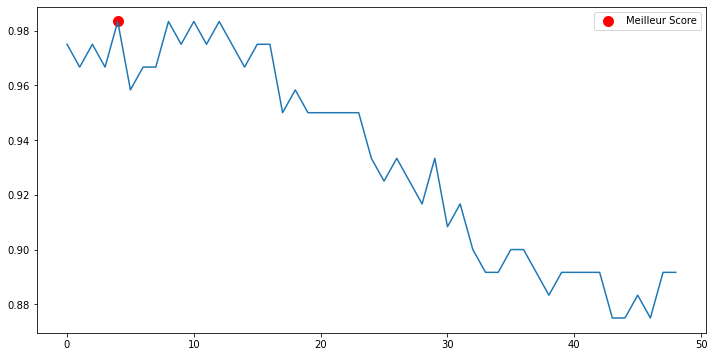

In [255]:
plt.figure(figsize=(12, 6))
plt.scatter(score_top[0], score_top[1], c="red", lw=5, label="Meilleur Score")
plt.plot(scores_i, label="")
plt.legend()
plt.show()

Encore une autre manière qui utilise seulement les fonctions de sklearn

In [258]:
from sklearn.model_selection import validation_curve
model=KNeighborsClassifier()
k=np.arange(1, 50)
train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)


TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

NameError: name 'k' is not defined

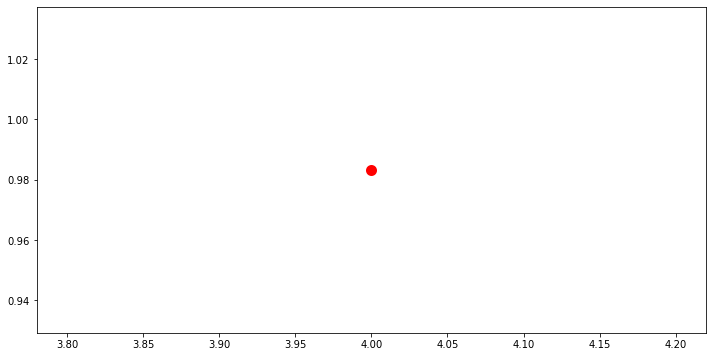

In [256]:
plt.figure(figsize=(12, 6))
#plt.scatter(score_top[0], score_top[1], c="red", lw=5, label="Meilleur Score")
plt.plot(k, val_score.mean(axis=1), label="")
plt.legend()
plt.show()